In [2]:
#Import modules and data ¶
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use("fivethirtyeight") # styling the charts

# data prep
from sklearn.model_selection import train_test_split

# ML algos
from sklearn.linear_model import LinearRegression



In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/vkoul/data/main/misc/tshirt_sales.csv")
scenario = pd.read_csv("https://raw.githubusercontent.com/vkoul/data/main/misc/business_scenario.csv")

In [5]:
scenario.columns
scenario.head()

,business_context,scenario,dollar_price,advertisment,promotions
0,High price; high marketing,Scenario 1,10,50,61
1,Medium price; medium marketing,Scenario 2,8,45,55
2,Low price; low marketing,Scenario 3,6,40,50
3,High price; low marketing,Scenario 4,10,40,50


In [6]:
df.columns

Index(['Year', 'Month', 'units_sold', 'dollar_price', 'advertisment',
       'promotions'],
      dtype='object')

In [7]:
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          24 non-null     int64  
 1   Month         24 non-null     int64  
 2   units_sold    24 non-null     int64  
 3   dollar_price  24 non-null     float64
 4   advertisment  24 non-null     float64
 5   promotions    24 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 1.2 KB


,Year,Month,units_sold,dollar_price,advertisment,promotions
0,2019,1,73959,8.75,50.04,61.13
1,2019,2,71544,8.99,50.74,60.19
2,2019,3,78587,7.50,50.14,59.16
3,2019,4,80364,7.25,50.27,60.38
4,2019,5,78771,7.40,51.25,59.71


In [8]:
# missing values
df.isna().sum()

Year            0
Month           0
units_sold      0
dollar_price    0
advertisment    0
promotions      0
dtype: int64

In [9]:
key_columns = ['units_sold', 'dollar_price', 'advertisment','promotions']
key_columns

['units_sold', 'dollar_price', 'advertisment', 'promotions']

In [10]:
df[key_columns].describe().round(2)

,units_sold,dollar_price,advertisment,promotions
count,24.00,24.00,24.00,24.00
mean,74258.29,8.13,50.15,59.88
std,3164.39,0.51,1.28,0.68
min,69003.00,7.25,48.00,58.00
25%,71959.50,7.90,49.40,59.64
50%,74103.00,8.15,50.12,59.90
75%,76354.50,8.43,50.77,60.24
max,80364.00,8.99,54.00,61.13


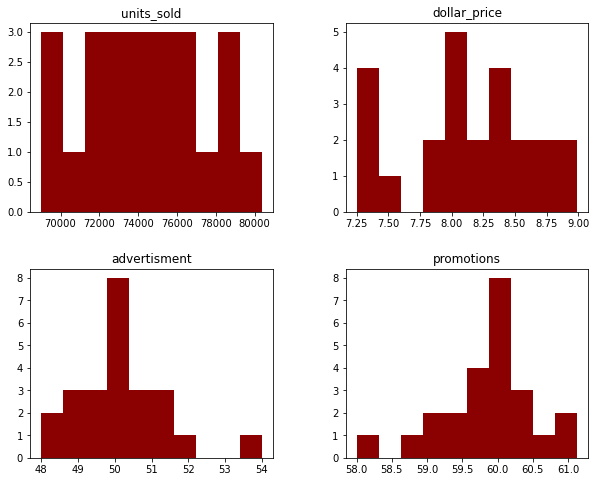

In [11]:
df[key_columns].hist(figsize = (10, 8), grid = False, color= 'darkred');

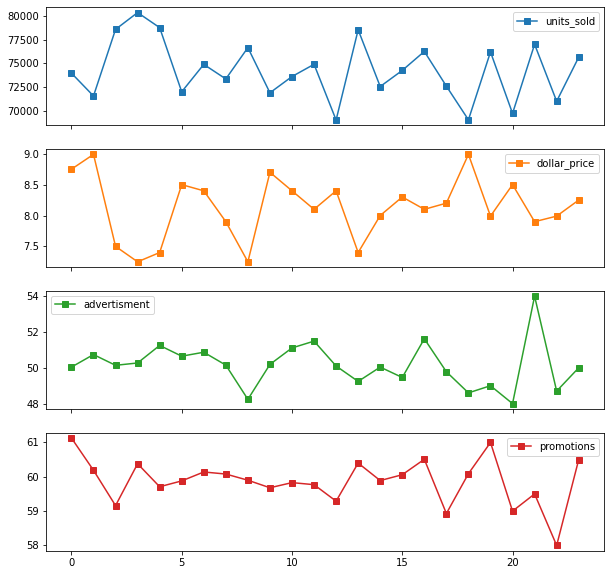

In [12]:
df[key_columns].plot.line(figsize = (10, 10), subplots=True, marker = 's');

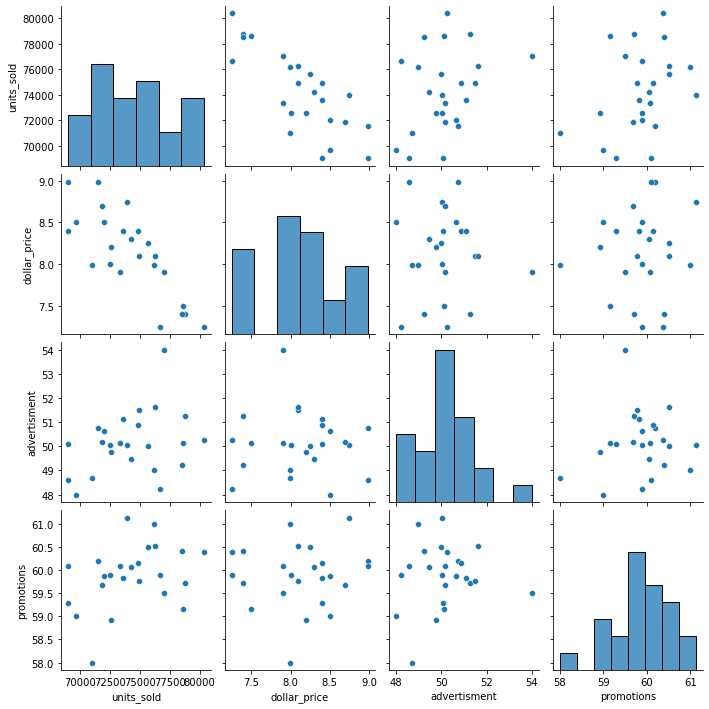

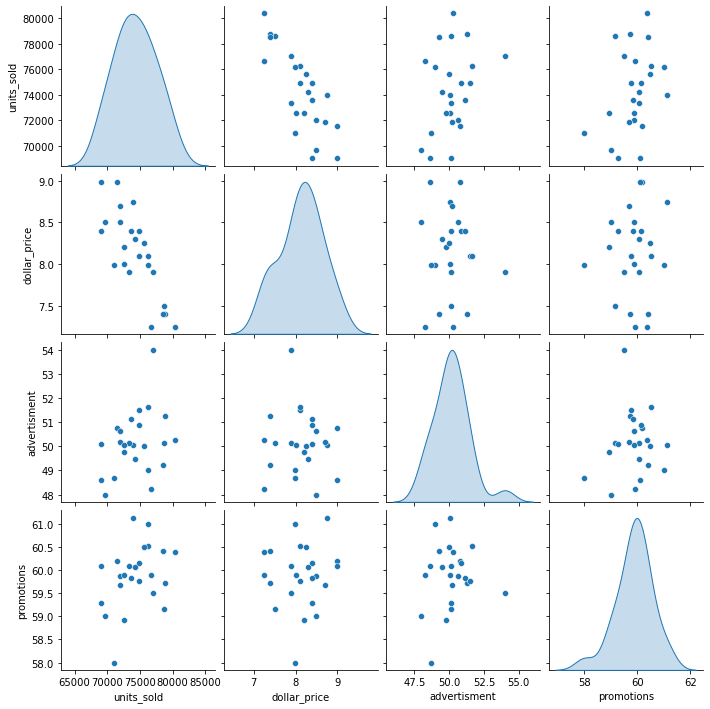

In [13]:
sns.pairplot(df[key_columns]);
sns.pairplot(df[key_columns], diag_kind = 'kde');

In [14]:
corr = df[key_columns].corr().round(3)

plt.figure(figsize = (10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

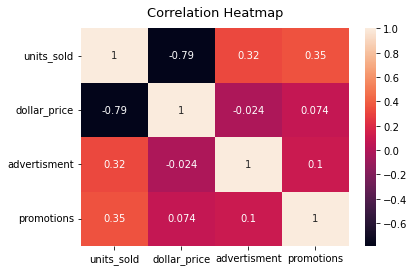

In [15]:
sns.heatmap(corr, annot = True).set_title('Correlation Heatmap', fontdict={'fontsize':13}, pad=12); # ADD TITLE

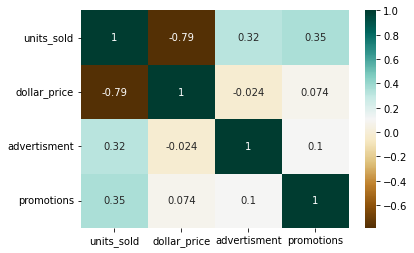

In [16]:
sns.heatmap(corr, annot = True, cmap='BrBG');

/var/folders/tq/6mc8mjr506ggybqhtj5lz2w00000gn/T/ipykernel_8145/3068272068.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tri_corr = np.triu(np.ones_like(corr, dtype=np.bool))


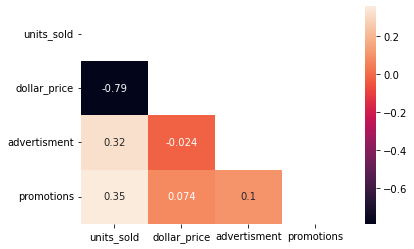

In [17]:
tri_corr = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, annot = True, mask = tri_corr);       

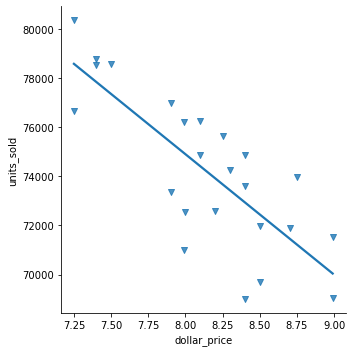

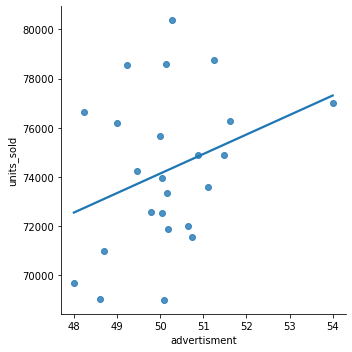

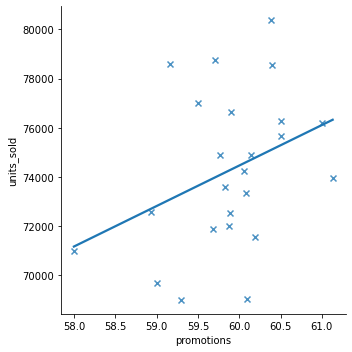

In [18]:
sns.lmplot(x = "dollar_price", y = "units_sold", data = df,  order = 1, markers= ['v'], ci = False);
sns.lmplot(x = "advertisment", y = "units_sold", data = df, ci = False, order = 1, markers= ['o']);
sns.lmplot(x = "promotions", y = "units_sold", data = df, ci = False, order = 1, markers= ['x']);

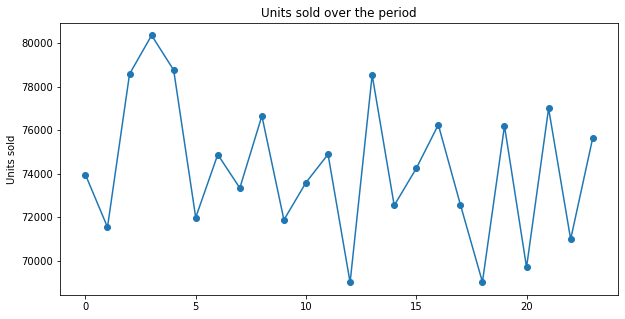

In [19]:
# # Plotting the linecharts

#plot size
plt.figure(figsize = (10,5))

# # line chart
df["units_sold"].plot(kind = "line", label = "actual_units", marker = "o");


# # labels
plt.ylabel("Units sold")
plt.title("Units sold over the period")

# # show
plt.show();

In [20]:
# splitting the data 

X = df[key_columns].drop(columns = "units_sold")
y = df["units_sold"]
# # doing train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [21]:
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)

print("\n")

print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

display(x_train.head())
display(y_train.head())

x_train:  (19, 3)
x_test:  (5, 3)


y_train:  (19,)
y_test:  (5,)


,dollar_price,advertisment,promotions
6,8.40,50.87,60.14
15,8.30,49.46,60.06
0,8.75,50.04,61.13
13,7.40,49.24,60.40
2,7.50,50.14,59.16


6     74885
15    74247
0     73959
13    78542
2     78587
Name: units_sold, dtype: int64

model building

In [22]:
# call the model 
model = LinearRegression()

# fit the model
model.fit(x_train, y_train)

# # calculate the score
print("R^2: {:.2f}".format(model.score(x_train, y_train)))

# make the predictions on train data
predictions = np.round(model.predict(x_train),1)

# accuracy metrics
print("RMSE: {:.2f}".format(mean_squared_error(y_train, predictions, squared = False)))
print("MAE: {:.2f}".format(mean_absolute_error(y_train, predictions))) # the 2f means that its is for 2 decimal

R^2: 0.87
RMSE: 1144.65
MAE: 809.04


In [23]:
# combine the actual data and predictions
output = pd.DataFrame({"actual": y_train, 
                       "predictions": predictions})

# sort the index
output = output.sort_index()

# new output
output.head()

,actual,predictions
0,73959,73447.8
1,71544,70763.2
2,78587,76394.2
3,80364,80170.6
4,78771,78657.9


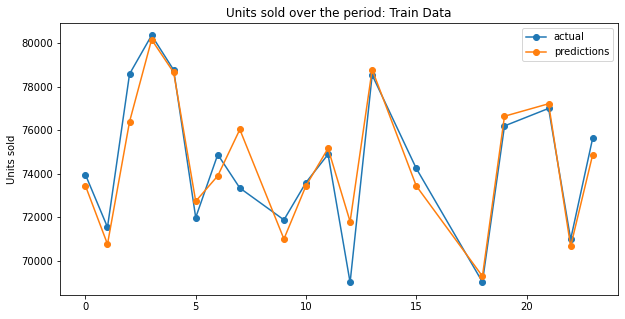

In [24]:
# add prediction back to the data and visualise

#plot size
plt.figure(figsize = (10,5))

# line chart
plt.plot(output["actual"], marker = "o", label = "actual")
plt.plot(output["predictions"], marker = "o", label = "predictions")

# labels
plt.ylabel("Units sold")
plt.title("Units sold over the period: Train Data")

# show labels
plt.legend()

# show
plt.show();

In [25]:
# predicting for test data 

test_predictions = np.round(model.predict(x_test),1)

# calculate the score
(model.score(x_test, y_test))
print("R^2 of test: {:.2f}".format(model.score(x_test, y_test)))


# accuracy metrics
print("RMSE of test: {:.2f}".format(mean_squared_error(y_test, test_predictions, squared = False)))
print("MAE of test: {:.2f}".format(mean_absolute_error(y_test, test_predictions))) # the 2f means that its is for 2 decimal

R^2 of test: 0.74
RMSE of test: 1330.18
MAE of test: 1033.68


In [26]:
test_output = pd.DataFrame({"actual": y_test, 
                           "test_predictions": test_predictions})

# sorting index
test_output = test_output.sort_index()
test_output.head()

,actual,test_predictions
8,76659,78027.3
14,72543,75067.5
16,76253,76676.5
17,72582,71984.0
20,69701,69446.9


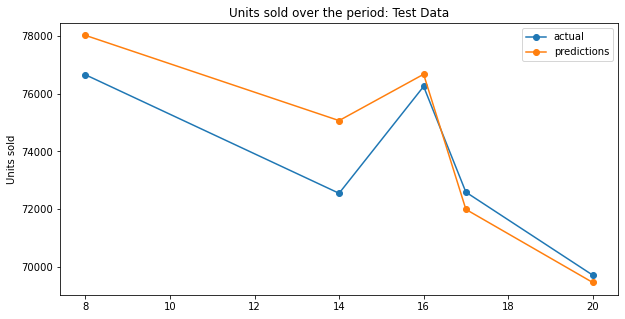

In [27]:
# plot size
plt.figure(figsize = (10,5))

# line chart
plt.plot(test_output["actual"], marker = "o", label = "actual")
plt.plot(test_output["test_predictions"], marker = "o", label = "predictions")

# labels
plt.ylabel("Units sold")
plt.title("Units sold over the period: Test Data")

# show labels
plt.legend()

# show
plt.show();

A linear regression model is of the type:  𝑦=𝛽0+𝛽1𝑥1+𝛽2𝑥2+𝛽3𝑥2  ; where  𝛽0  is the intercept and other  𝛽  are the coefficient of the columns.

The linear regression model will help us find the value of these  𝛽

In [28]:
# printing the results after rounding off
print("The intercept is:", np.round(model.intercept_,1))
print("The co-efficients are:", np.round(model.coef_,1))

The intercept is: -27846.9
The co-efficients are: [-5357.    598.5  1933.9]


,Coefficient
dollar_price,-5357.0
advertisment,598.5
promotions,1933.9


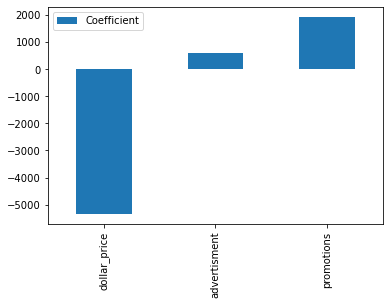

In [29]:
#Putting the above information in a data-frame which is readable 𝑦=𝛽0+𝛽1𝑥1+𝛽2𝑥2+𝛽3𝑥2 
# 𝛽0,𝛽1,𝛽2
coeffs = pd.DataFrame(np.round(model.coef_,1), x_train.columns, columns = ["Coefficient"])
display(coeffs)
coeffs.plot(kind = "bar");




Hence our equation will be:

𝑢𝑛𝑖𝑡𝑠𝑠𝑜𝑙𝑑=−27846.9+−5357.0⋅𝑑𝑜𝑙𝑙𝑎𝑟𝑝𝑟𝑖𝑐𝑒+598.5⋅𝑎𝑑𝑣𝑒𝑟𝑡𝑖𝑠𝑚𝑒𝑛𝑡+1933.9⋅𝑝𝑟𝑜𝑚𝑜𝑡𝑖𝑜𝑛𝑠

In [31]:

scenario[['dollar_price', 'advertisment','promotions']]

,dollar_price,advertisment,promotions
0,10,50,61
1,8,45,55
2,6,40,50
3,10,40,50


In [34]:
# adding the predictions to the data 
scenario["projections"] = projections
scenario.style.set_properties(**{'background-color': 'darkred',
'color': 'white',
'border-color': 'white'}, subset= ['projections'])

,business_context,scenario,dollar_price,advertisment,promotions,projections
0,High price; high marketing,Scenario 1,10,50,61,66476.000000
1,Medium price; medium marketing,Scenario 2,8,45,55,62594.000000
2,Low price; low marketing,Scenario 3,6,40,50,60646.000000
3,High price; low marketing,Scenario 4,10,40,50,39218.000000


In [33]:
# making the predictions
projections = np.round(model.predict(scenario[['dollar_price', 'advertisment','promotions']]),0)
projections

array([66476., 62594., 60646., 39218.])

In [35]:
# Filter out the final scenario
scenario[scenario["projections"] == scenario["projections"].max()]

,business_context,scenario,dollar_price,advertisment,promotions,projections
0,High price; high marketing,Scenario 1,10,50,61,66476.0


In [36]:
scenario.style.apply(lambda x: ['background:darkorange' if x in "Scenario 1" else None for x in scenario.scenario])

,business_context,scenario,dollar_price,advertisment,promotions,projections
0,High price; high marketing,Scenario 1,10,50,61,66476.000000
1,Medium price; medium marketing,Scenario 2,8,45,55,62594.000000
2,Low price; low marketing,Scenario 3,6,40,50,60646.000000
3,High price; low marketing,Scenario 4,10,40,50,39218.000000
